# SPAM MESSAGES CLASSIFIER

### Workflow
This project will be divided in to 7 parts namely
1. Data Cleaning
2. Exploratory Data Analysis
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Application

### Importing Modules

In [4]:
import pandas as pd
import numpy as np

### Loading Dataset

In [5]:
df = pd.read_csv('spam.csv', encoding='latin')

### Basic Data Exploration

How our data looks like?

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


What are the dimensions of our dataset?

In [7]:
df.shape

(5572, 5)

What are the columns and their datatypes?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Are there any missing values?

In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Are there any duplicate values?

In [10]:
df.duplicated().sum()

403

### Data Cleaning

First of all drop the unnamed columns as these columns do not contain useful values.

In [11]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

Now let's rename the remaining columns to be more descriptive

In [12]:
df.rename(columns={'v1': 'target', 'v2': 'message'}, inplace=True)

In [13]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Before going any further, let's just encode the target variable using sklearn's LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Unfortunately, as we saw earlier our dataset contains duplicate values. Therefore it is crucial to remove those entries.

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### Exploratory Data Analysis

Let's first see how  ham and spam values are distributed in our dataset.

In [18]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

To better visualize it, we are gonna use matplolib's pie plot.

In [19]:
import matplotlib.pyplot as plt

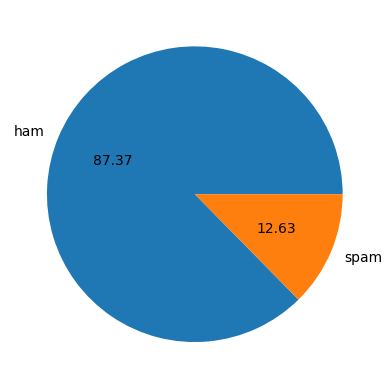

In [20]:
plt.pie(df.target.value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

Hence we are sure that our data is **imbalanced** meaning there are more ham than spam.

Now let's see typically how many characters, words and sentences are there in messages.

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['n_characters'] = df['message'].apply(len)
df.head()

,target,message,n_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['n_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,message,n_characters,n_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['n_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,message,n_characters,n_words,n_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


now let's see how number of characters, words and sentences are distributed

In [26]:
df[['n_characters', 'n_words', 'n_sentences']].describe()

,n_characters,n_words,n_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Let's do the same thing for ham messages.

In [27]:
df[df['target'] == 0][['n_characters', 'n_words', 'n_sentences']].describe()

,n_characters,n_words,n_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


for spam messages

In [28]:
df[df['target'] == 1][['n_characters', 'n_words', 'n_sentences']].describe()

,n_characters,n_words,n_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


So, typically spam messages are longer as described above. They contain more characters, words and sentences as compared to ham messages.

let's now better visualize it using seaborn

In [29]:
import seaborn as sns

<Axes: xlabel='n_characters', ylabel='Count'>

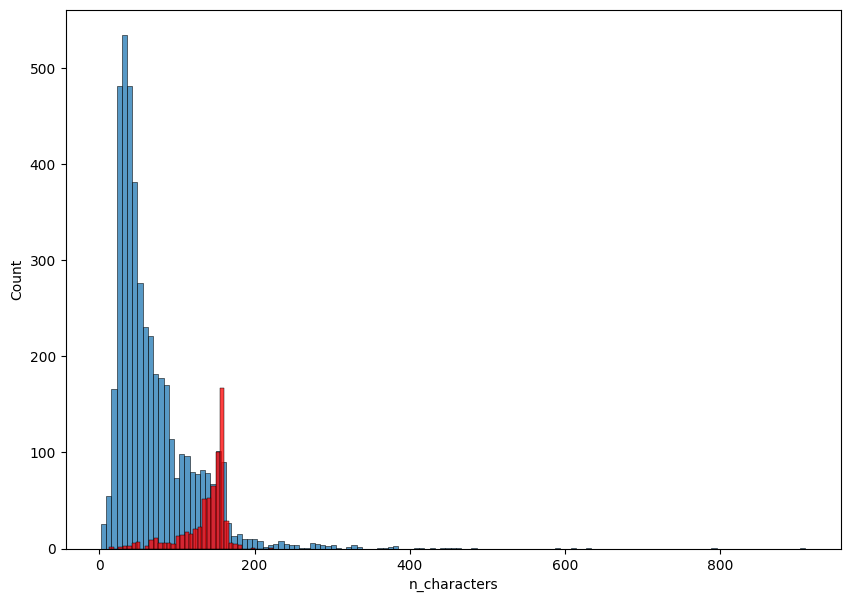

In [30]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df['target'] == 0]['n_characters'])
sns.histplot(df[df['target'] == 1]['n_characters'], color='red')

<Axes: xlabel='n_words', ylabel='Count'>

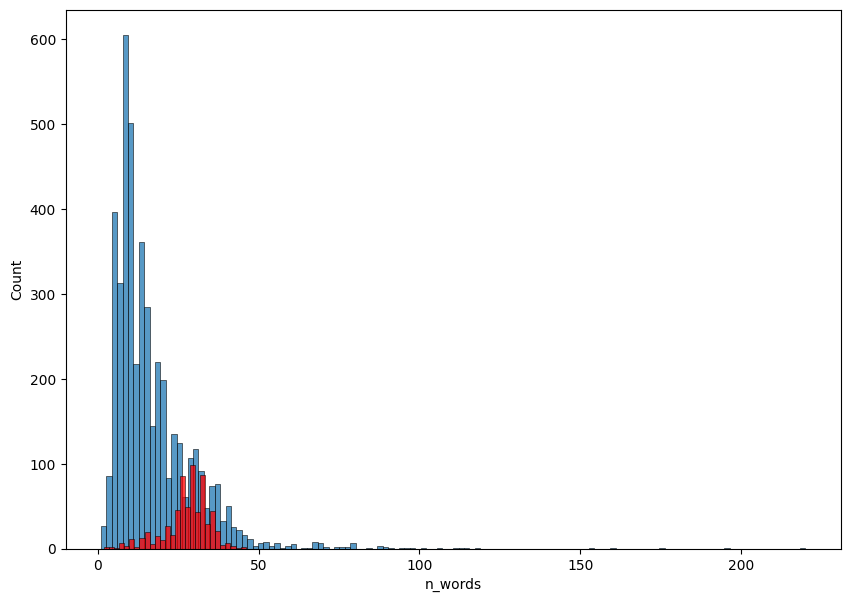

In [31]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df['target'] == 0]['n_words'])
sns.histplot(df[df['target'] == 1]['n_words'], color='red')

These graphs implies the same conclusion.

Now let's see how character, words, and sentences and target are related with each other using pairplot

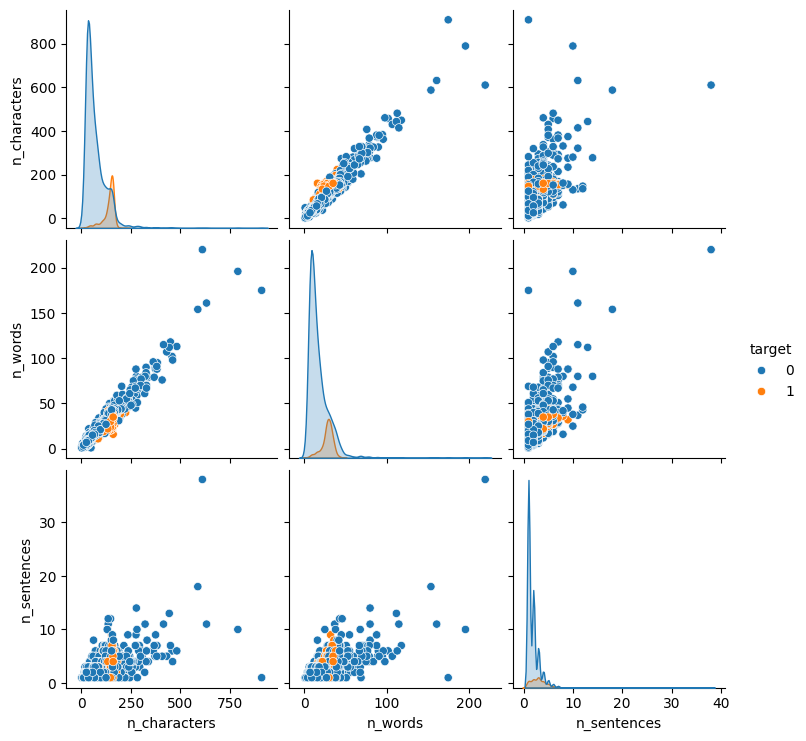

In [32]:
sns.pairplot(df,hue='target')

Last thing to check before moving towards text preprocessing is pearson correlation coefficient. We will visualize it using `sns.heatmap`

<ipython-input-33-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

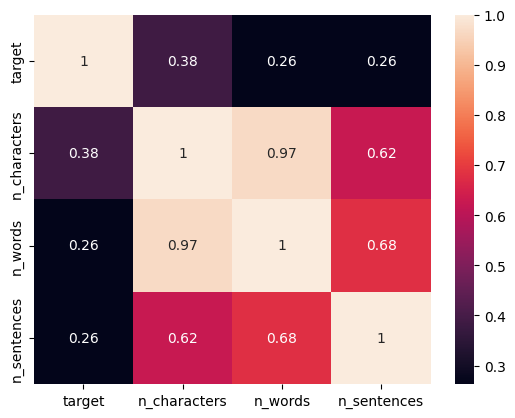

In [33]:
sns.heatmap(df.corr(),annot=True)

It can be seen that n_words, n_characters and n_sentences have large correlation with each other. Hence to avoid collinearity we will only consider one of them.

## Text Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

sw = stopwords.words('english')
p = string.punctuation

In [36]:
def preprocess_text(text):
  text = text.lower()
  text_tokenized = nltk.word_tokenize(text)
  text_processed = [ps.stem(word) for word in text_tokenized if word.isalnum() and word not in sw and word not in p]
  return " ".join(text_processed)

In [37]:
preprocess_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [38]:
df['processed_message'] = df['message'].apply(preprocess_text)

In [39]:
df.head()

,target,message,n_characters,n_words,n_sentences,processed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['processed_message'].str.cat(sep=" "))

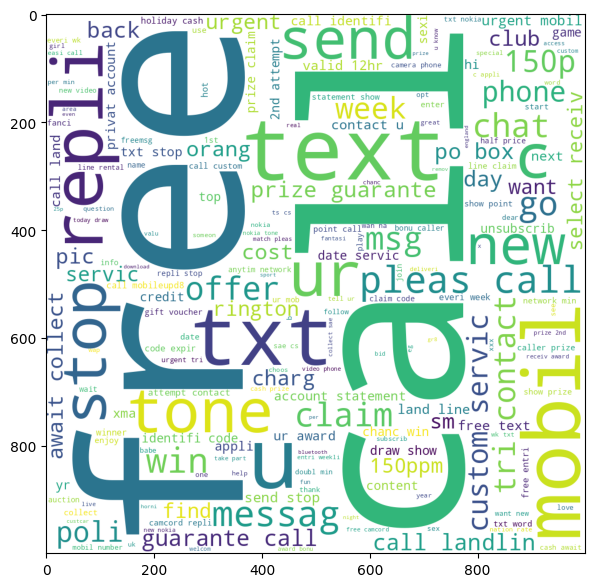

In [42]:
plt.figure(figsize=(7,7))
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['processed_message'].str.cat(sep=" "))

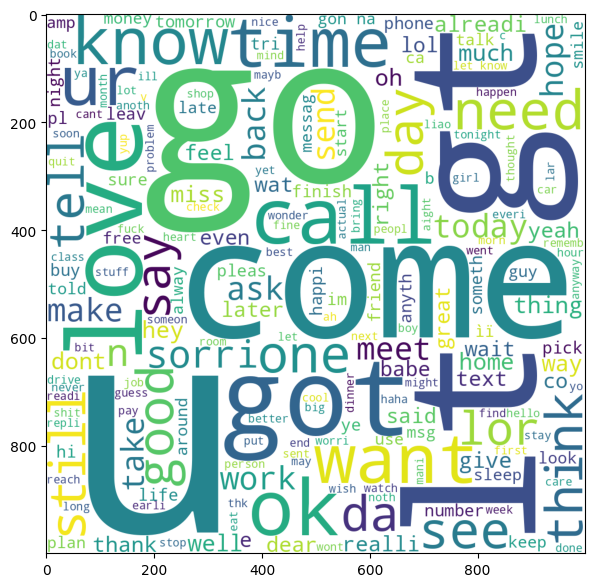

In [44]:
plt.figure(figsize=(7,7))
plt.imshow(ham_wc)

In [45]:
spam_corpus = []
for msg in df[df['target'] == 1]['processed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

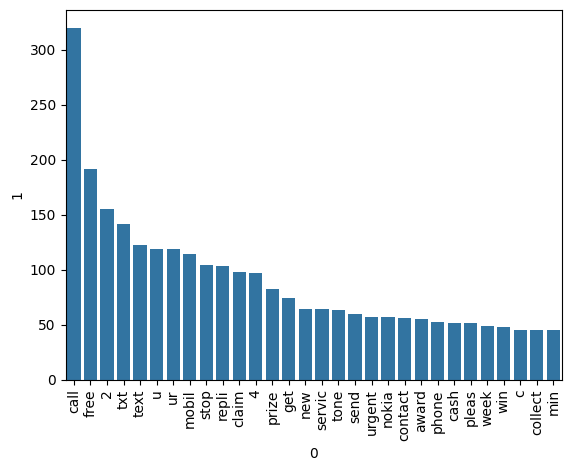

In [47]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus = []
for msg in df[df['target'] == 0]['processed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35404

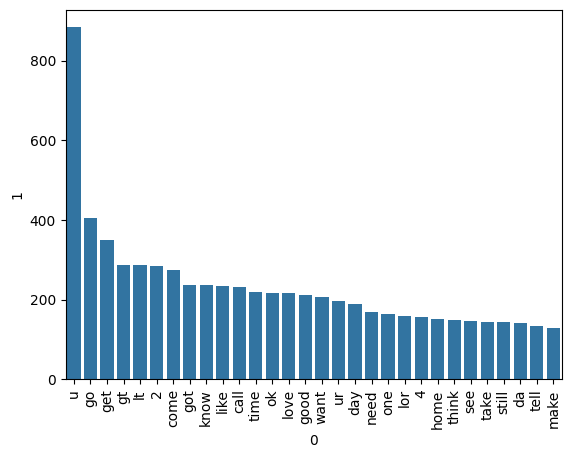

In [50]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

### Text Vectorization

Let's now move towards building our model. So, the first step would be to transform our text to vectors (numeric). For that there are two approaches.

#### 1. Bag of Words
A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

Once a vocabulary has been chosen, the occurrence of words in example documents needs to be scored.

- **Counts** Count the number of times each word appears in a document.<br>
- **Frequencies**. Calculate the frequency that each word appears in a document out of all the words in the document.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()

In [64]:
X = tfidf.fit_transform(df['processed_message']).toarray()

In [65]:
X.shape

(5169, 6708)

In [66]:
y = df['target'].values

### Training Naive Bayes Based Models

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [72]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [73]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Training Other Classification Based Models

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [93]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
